# Please note that if you do not have imblearn and tensorflow library installed in your sysytem,  this notebook would have to be restarted 3-times for imblearn and tensorflow library to be successfully installed and utilized.

In [1]:
!pip install --upgrade pip

ERROR: To modify pip, please run the following command:
C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip



  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)


In [2]:
!pip3 install imblearn

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\programdata\anaconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Regular exploratory data analysis and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from sklearn import preprocessing


# import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve

# Over Sampler
from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# import models for MLP
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [6]:
# read data
data = pd.read_csv('Breast_Cancer.csv')

## Exploratory Data Analysis

## Features
* Age: Age of the patient at the time of diagnosis.
* Race: The racial background of the patient.
* Marital Status: Whether the patient is married, single, divorced, etc.
* T Stage: The stage of the tumor, as determined by the TNM staging system.
* N Stage: The stage of the neighboring lymph nodes, as determined by the TNM staging system.
* 6th Stage: The 6th stage of the TNM staging system, which is determined by the size of the tumor and the presence of metastasis.
* Differentiate: The degree to which the tumor cells look like normal cells.
* Grade: The grade of the tumor, which is determined by the appearance of the tumor cells under the microscope.
* A Stage: The stage of the adjacent tissues, as determined by the TNM staging system.
* Tumor Size: The size of the tumor, as determined by imaging or physical examination.
* Estrogen Status: The presence or absence of estrogen receptors in the tumor cells.
* Progesterone Status: The presence or absence of progesterone receptors in the tumor cells.
* Regional Node Examined: The number of regional lymph nodes that were examined for the presence of cancer cells.
* Regional Node Positive: The number of regional lymph nodes that were found to contain cancer cells.
* Survival Months: The length of time (in months) between the patient's diagnosis and their death.
* Status: Whether the patient is alive or deceased.

In [7]:
# display top 5 rows
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [8]:
# last five columns
data.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [9]:
# Renaming some column names
data.rename({'Tumor Size' : 'Tumor Size (mm)', 'T Stage ': 'T Stage', 'Reginol Node Positive' : 'Regional Node Positive',
             'differentiate' : 'Differentiate'}, axis=1, inplace=True)

In [10]:
# checking the shape of the dataframe
data.shape

(4024, 16)

In [11]:
# display information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size (mm)         4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Regional Node Positive  4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [12]:
# checking sum of duplicated rows
data.duplicated().sum()

1

In [13]:
# keep first duplicate row
data = data.drop_duplicates()

In [14]:
# check for null values
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiate             0
Grade                     0
A Stage                   0
Tumor Size (mm)           0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
Status                    0
dtype: int64

In [15]:
# display more information about the data
data.describe()

,Age,Tumor Size (mm),Regional Node Examined,Regional Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [16]:
# finding out how many of each class there are
data['Status'].value_counts()

Alive    3407
Dead      616
Name: Status, dtype: int64

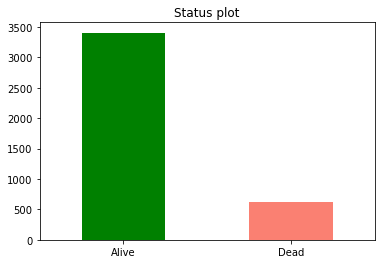

In [17]:
# visualizing the class
data['Status'].value_counts().plot(kind='bar', color=['green','salmon'])
plt.title('Status plot')
plt.xticks(rotation=0);

                         We have an imbalance data

In [18]:
# printing categorical columns name
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
print(f"Categorical Columns {len(cat_cols)}")
cat_cols

Categorical Columns 11


['Race',
 'Marital Status',
 'T Stage',
 'N Stage',
 '6th Stage',
 'Differentiate',
 'Grade',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status',
 'Status']

In [19]:
#printing numerical columns name
num_cols = [col for col in data.columns if data[col].dtype == 'int64']
print(f"Numerical Columns {len(num_cols)}")
num_cols

Numerical Columns 5


['Age',
 'Tumor Size (mm)',
 'Regional Node Examined',
 'Regional Node Positive',
 'Survival Months']

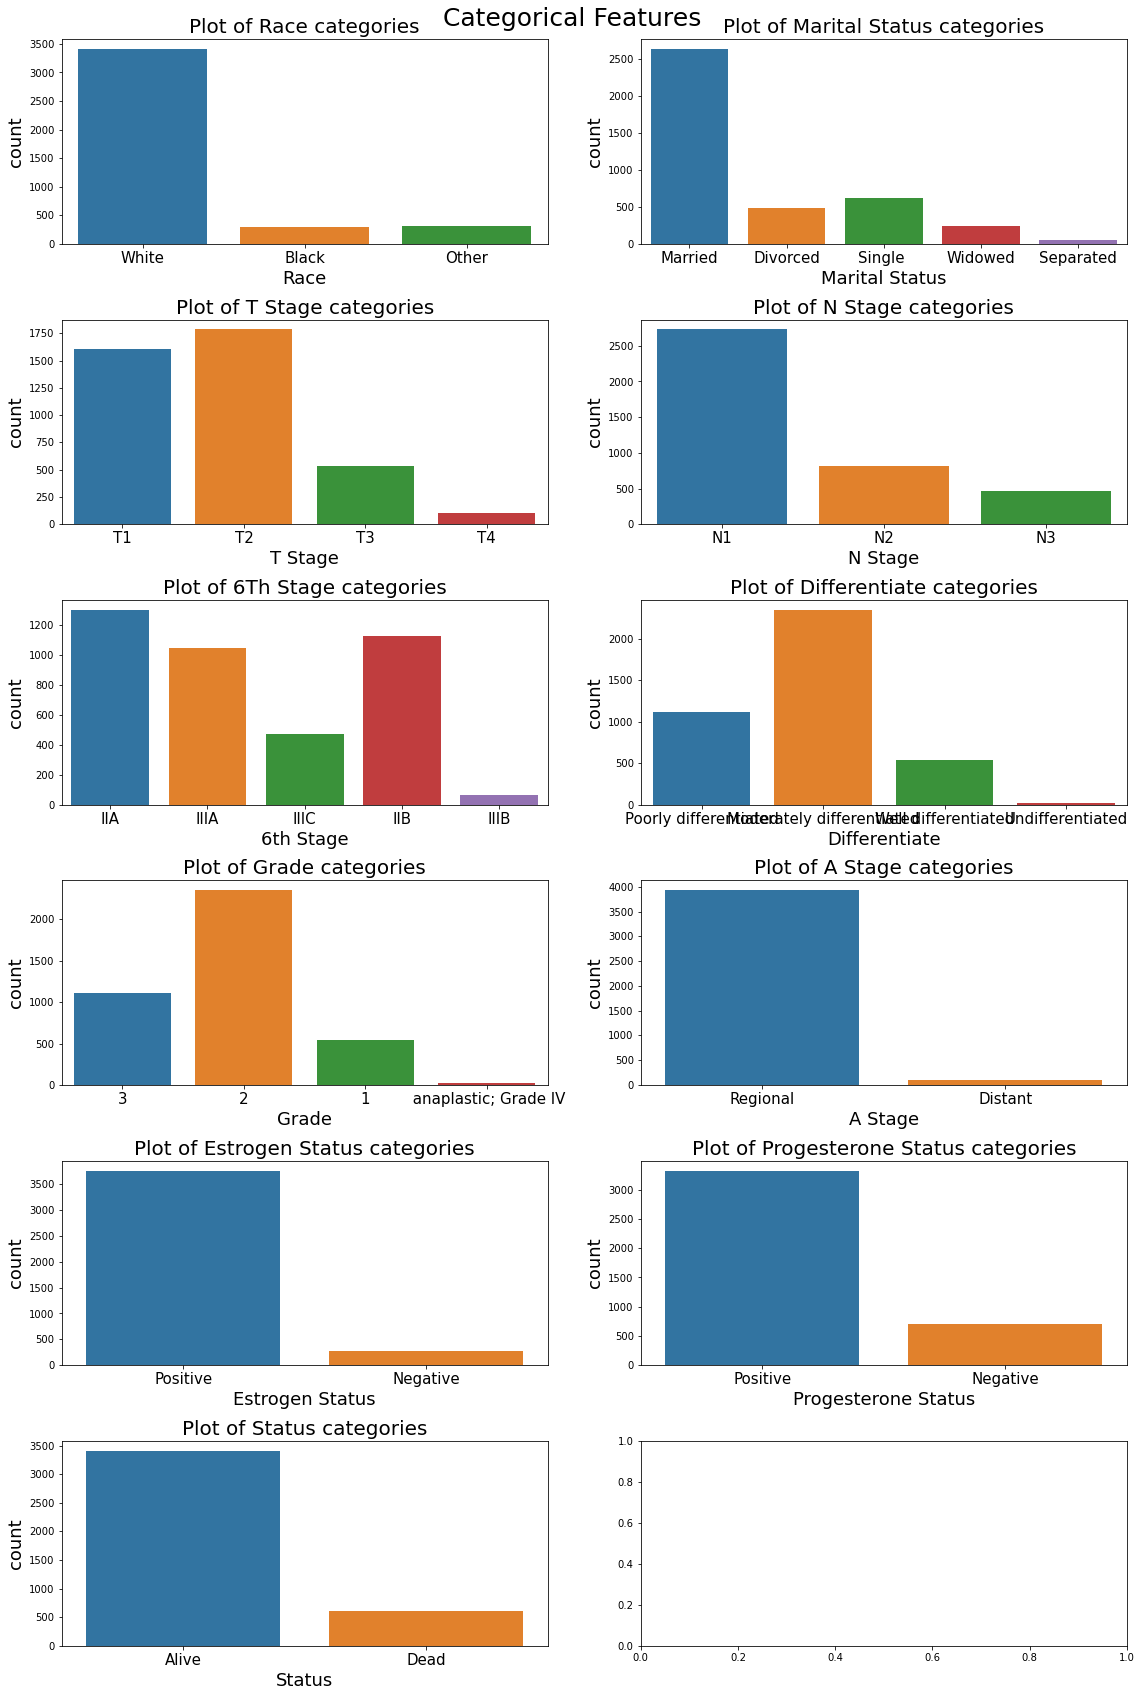

In [20]:
# plotting countplot of categoical features
fig, axes = plt.subplots(nrows=int(np.ceil(len(cat_cols)/2)), ncols=2, figsize = (16,24))
for i, col in enumerate(cat_cols):
    ax = axes[i//2, i%2]
    fig.suptitle('Categorical Features', fontsize=25, va='top')
    ax.set_title(f'Plot of {col.title()} categories', fontdict={'fontsize': 20})
    ax.set_xlabel('x label', fontdict={'fontsize': 18})
    ax.set_ylabel('Number of records', fontdict={'fontsize': 18})
    ax.tick_params(axis='x', labelsize=15)
    sns.countplot(x=col, data=data, ax=ax)

plt.tight_layout()
plt.show()

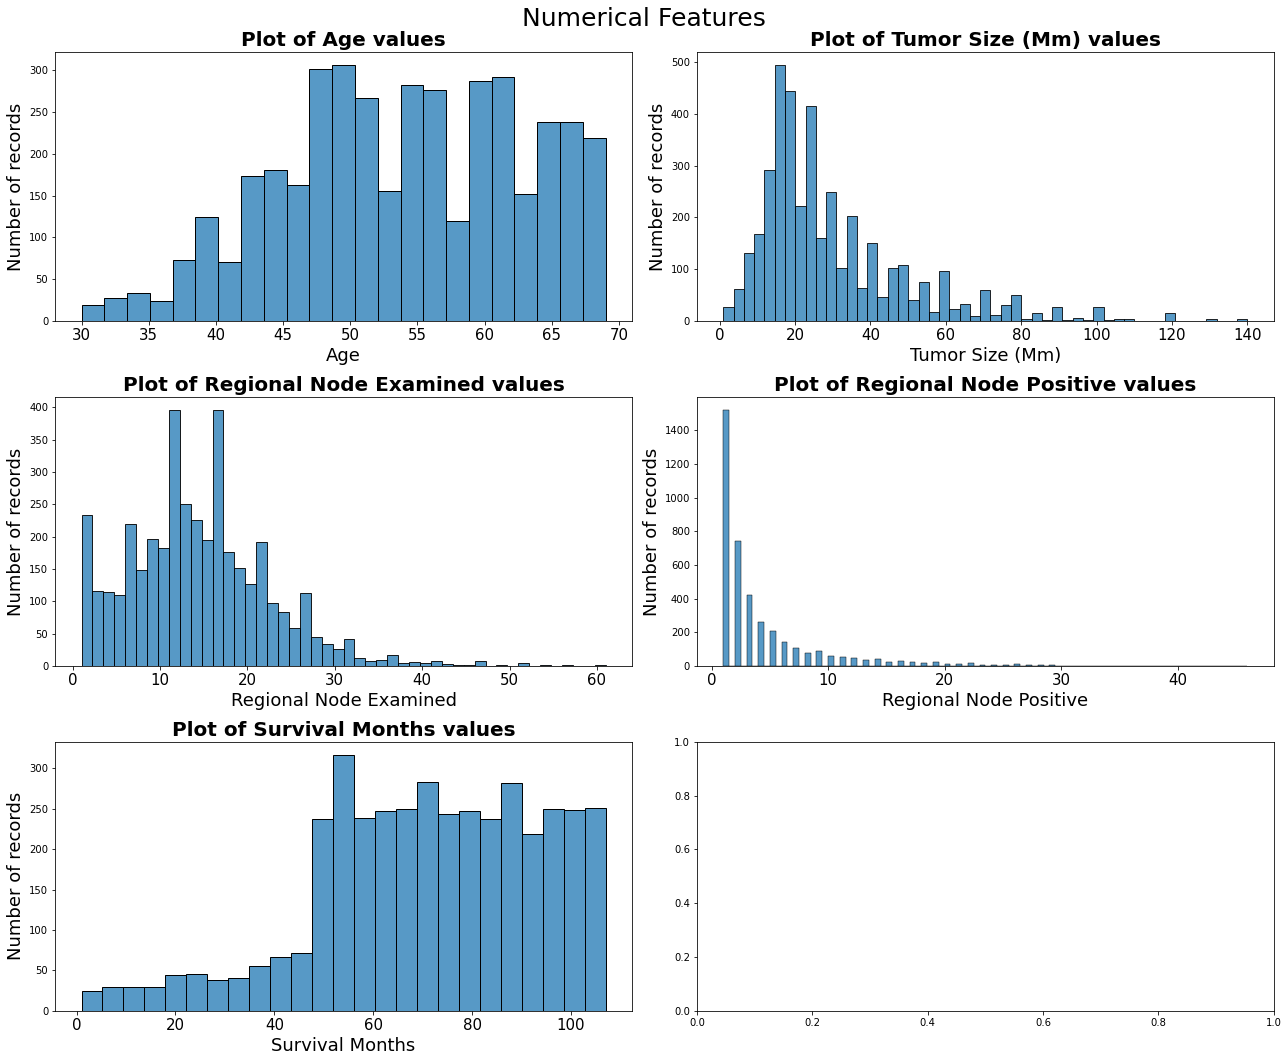

In [21]:
# plotting countplot of categoical features
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_cols)/2)), ncols=2, figsize = (18,15))
for i, col in enumerate(num_cols):
    ax = axes[i//2, i%2]
    fig.suptitle('Numerical Features', fontsize=25, va='top')
    ax.set_title(f'Plot of {col.title()} values', fontdict={'fontsize': 20},fontweight ='bold')
    ax.set_xlabel(col.title(), fontdict={'fontsize': 18})
    ax.set_ylabel('Number of records', fontdict={'fontsize': 18})
    ax.tick_params(axis='x', labelsize=15)
    sns.histplot(x=col, data=data, ax=ax)

plt.tight_layout()
plt.show()

`Tumor Size (mm)`, `Regional Node Examined`, `Regional Node Positive` are skewed to the left while `Age` and `Survival Months` are skewed to the right

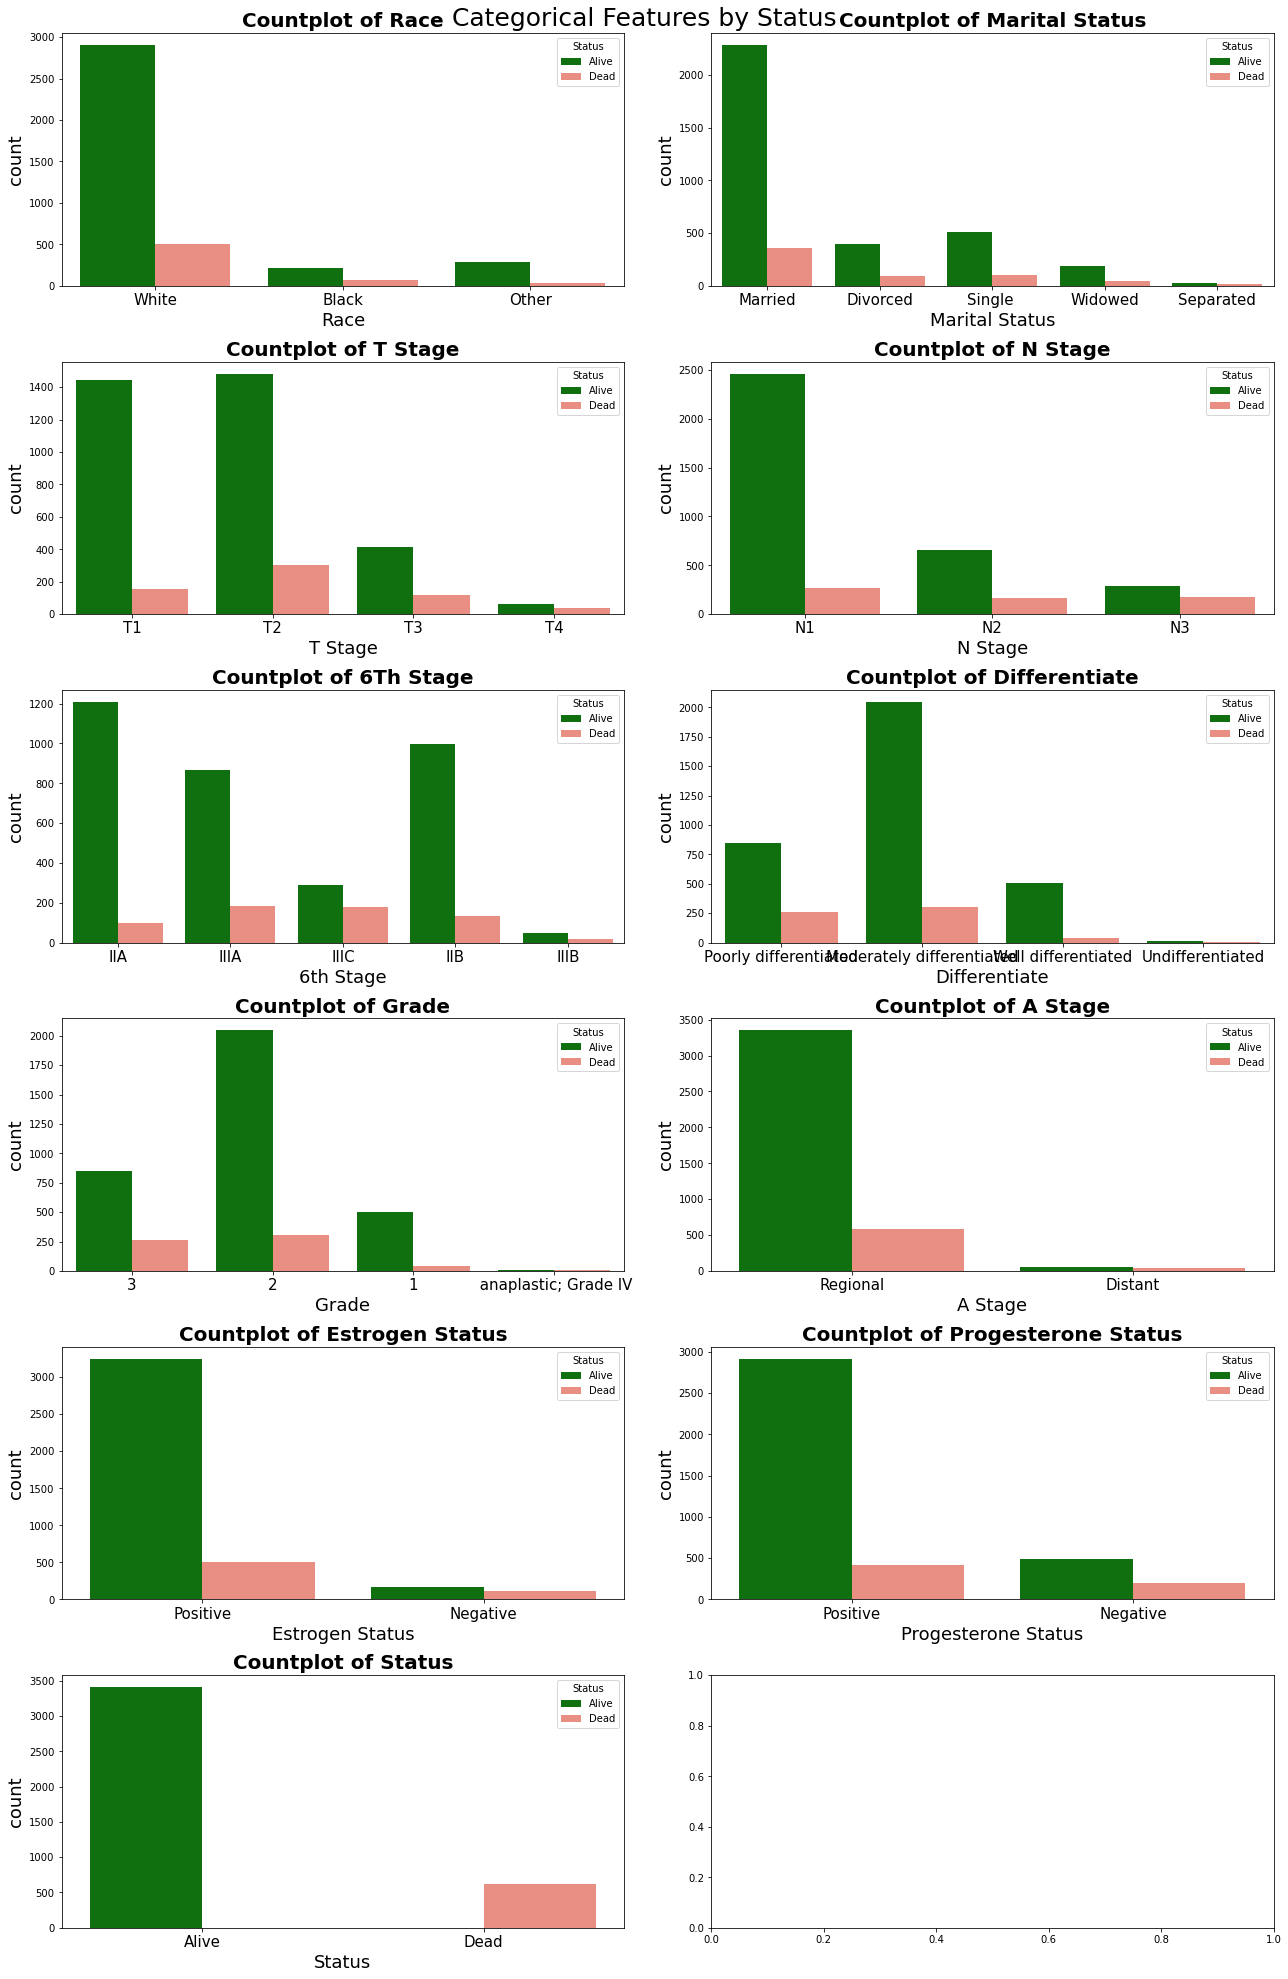

In [22]:
# distribution of categorical variables by status
fig, axes = plt.subplots(nrows=int(np.ceil(len(cat_cols)/2)), ncols=2, figsize = (18,28))
for i, col in enumerate(cat_cols):
    ax = axes[i//2, i%2]
    fig.suptitle('Categorical Features by Status', fontsize=25, va='top')
    ax.set_title(f'Countplot of {col.title()}', fontdict={'fontsize': 20},fontweight ='bold')
    ax.set_xlabel('x label', fontdict={'fontsize': 18})
    ax.set_ylabel('Number of records', fontdict={'fontsize': 18})
    ax.tick_params(axis='x', labelsize=15)
    sns.countplot(x=col, data=data, ax=ax, hue=data['Status'],palette=['green', 'salmon'])

plt.tight_layout()
plt.show()

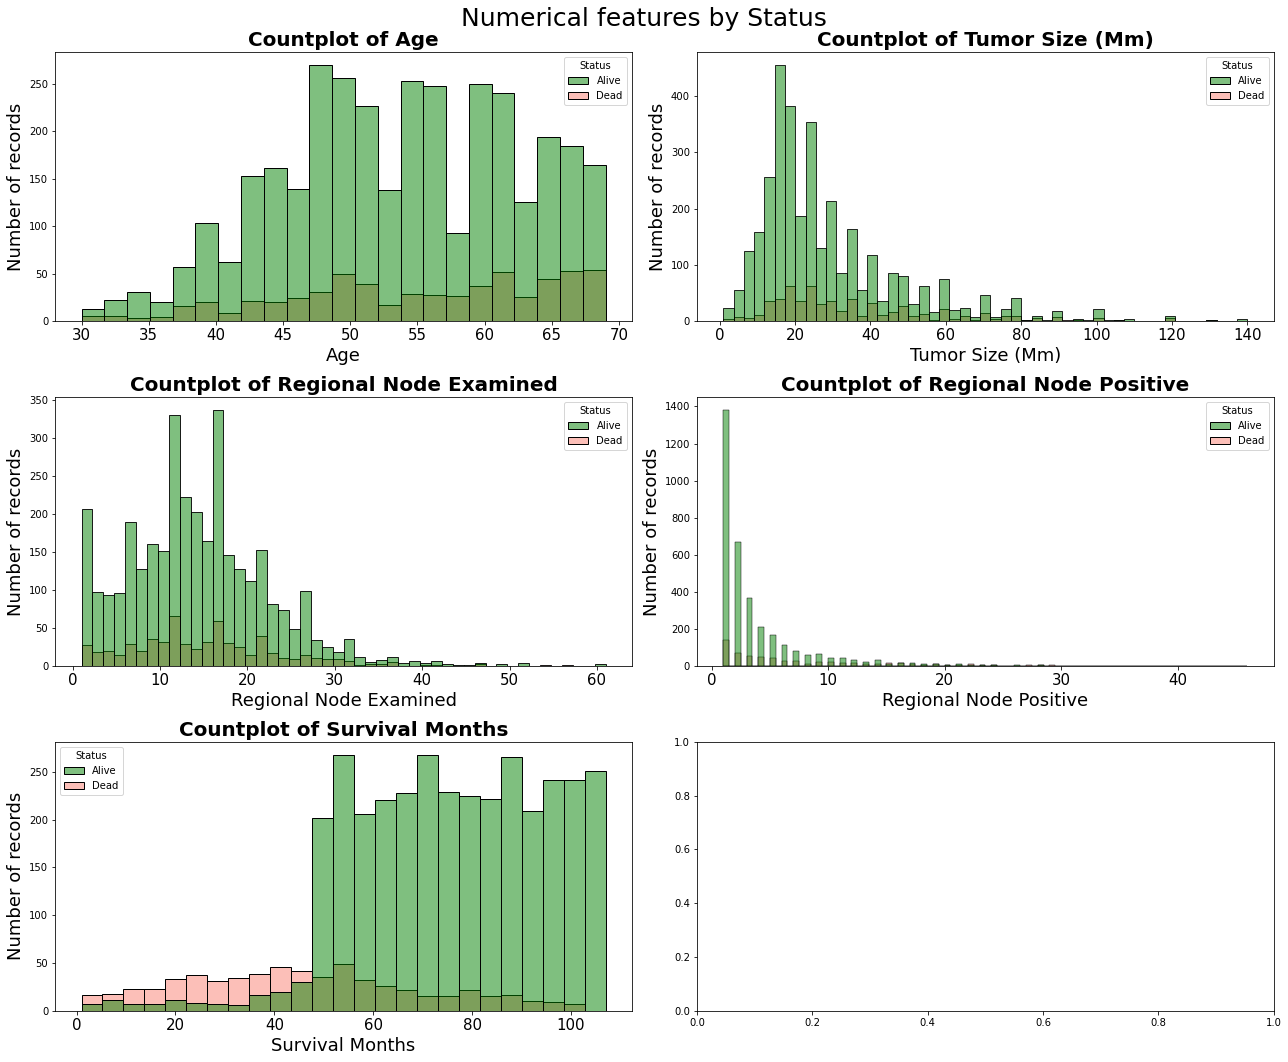

In [23]:
# distribution of numerical variables by status
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_cols)/2)), ncols=2, figsize = (18,15))
for i, col in enumerate(num_cols):
    ax = axes[i//2, i%2]
    fig.suptitle('Numerical features by Status', fontsize=25, va='top')
    ax.set_title(f'Countplot of {col.title()}', fontdict={'fontsize': 20},fontweight ='bold')
    ax.set_xlabel(col.title(), fontdict={'fontsize': 18})
    ax.set_ylabel('Number of records', fontdict={'fontsize': 18})
    ax.tick_params(axis='x', labelsize=15)
    sns.histplot(x=col, data=data, ax=ax, hue=data['Status'], palette=['green', 'salmon'])

plt.tight_layout()
plt.show()

## Dealing with outliers

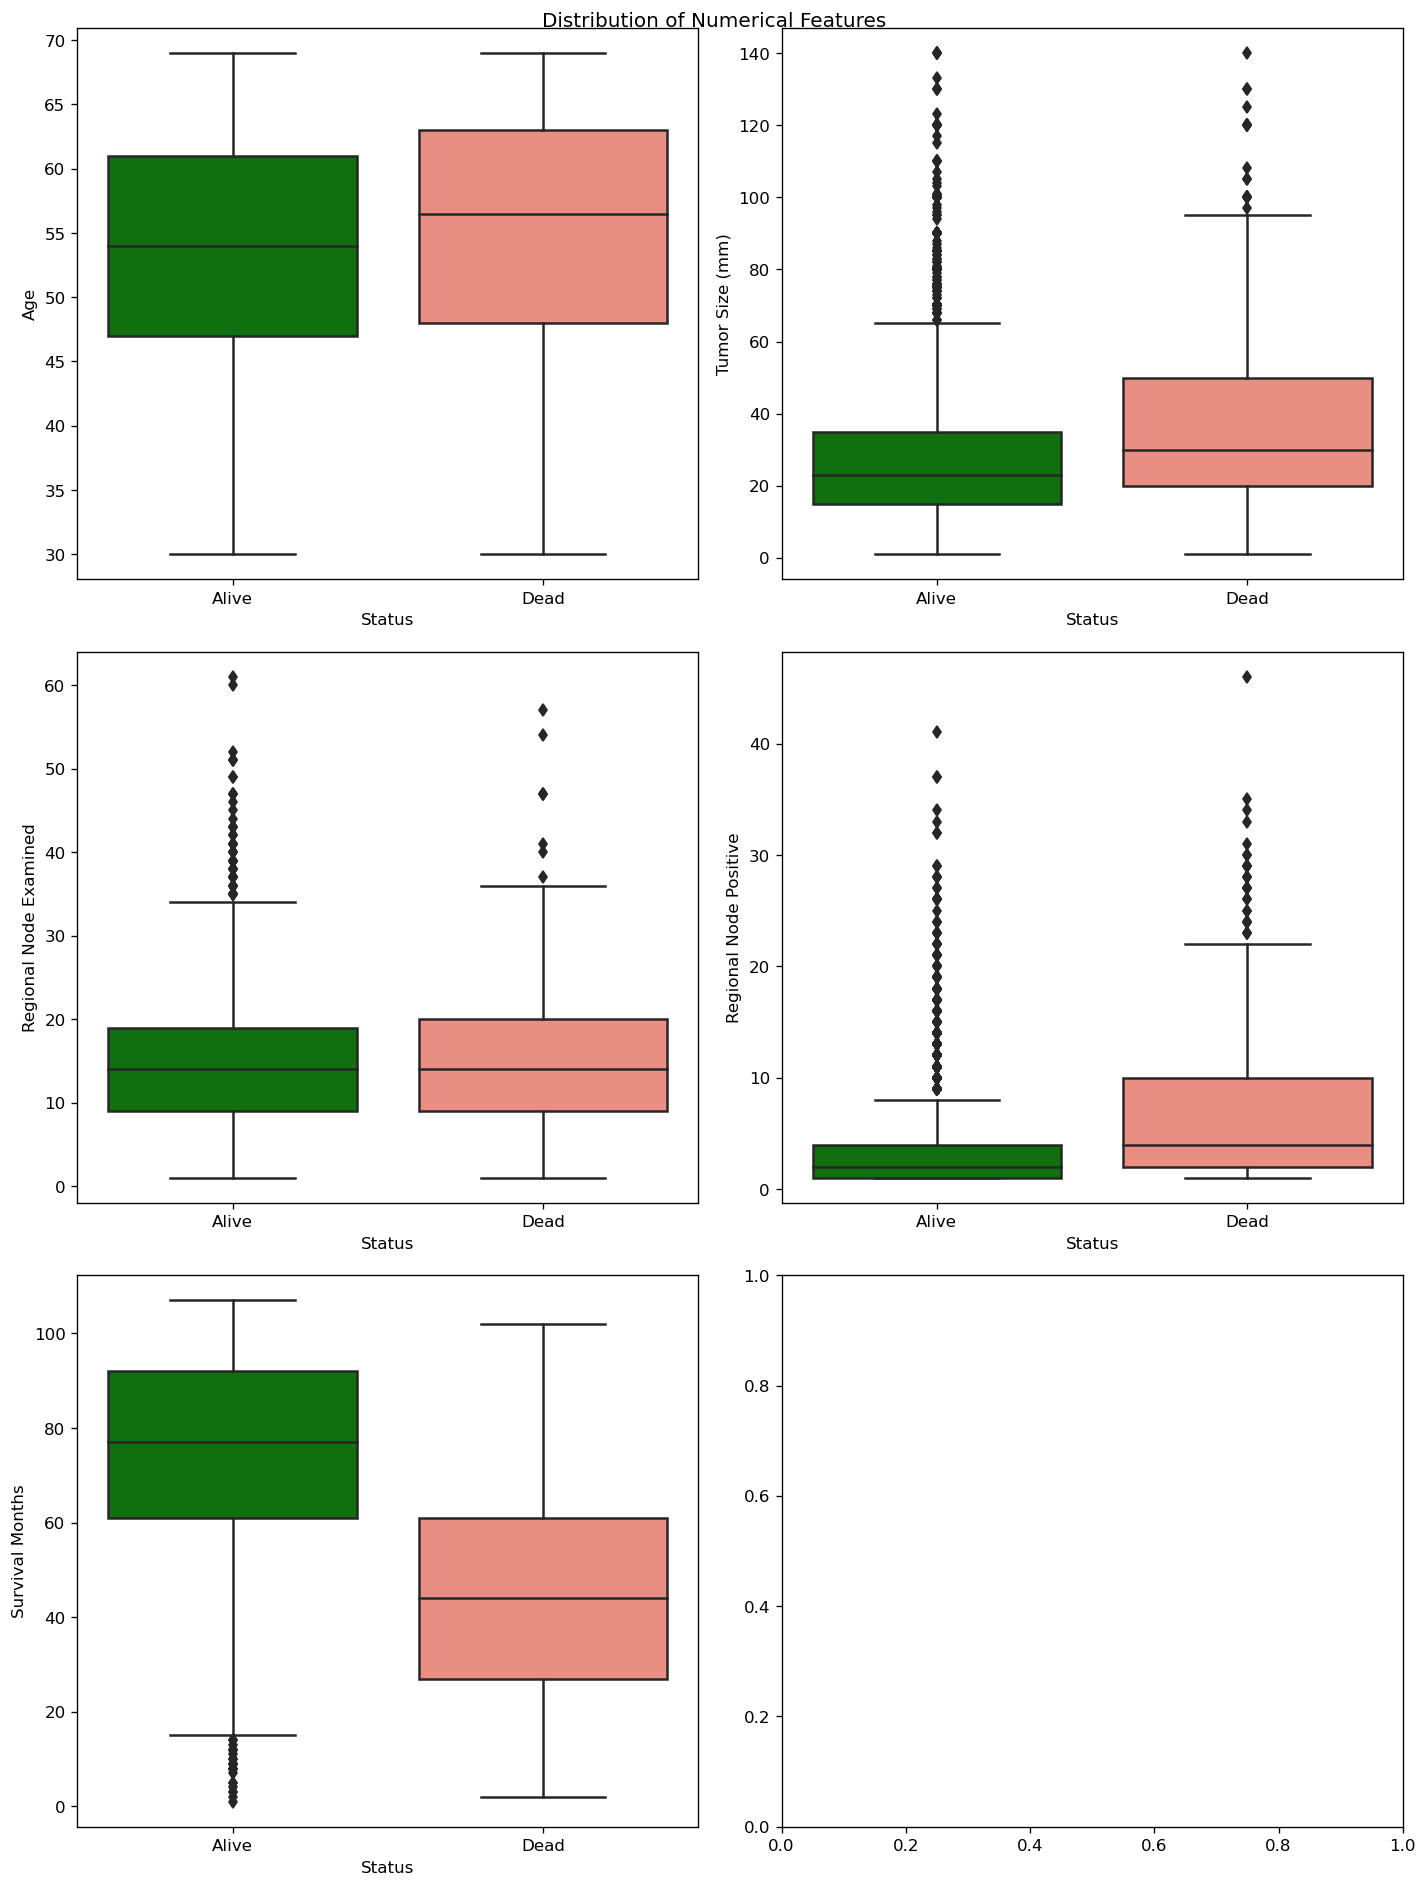

In [24]:
# Boxplot to visualize distribution of numerical features
box_cols = ['Age', 'Tumor Size (mm)', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,16), dpi=120)
fig.suptitle('Distribution of Numerical Features', y = 0.98);
for col, ax in zip(box_cols, axes.ravel()):
    sns.boxplot(data=data, x='Status', y=col, ax=ax, palette=['green','salmon'])
plt.tight_layout()

In [25]:
outlier_cols = ['Age', 'Tumor Size (mm)', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']
outlier_index = []
outlier_ind_list=[]

for col in outlier_cols:   
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    upper_bound = data[col].quantile(0.75) + (1.5 * IQR)
    lower_bound = data[col].quantile(0.25) - (1.5 * IQR)
    upper_outliers = data[col] >= upper_bound
    lower_outliers = data[col] <= lower_bound
    outliers = data[upper_outliers | lower_outliers].index
    outlier_index.extend(outliers)
    
# Outlier index with count
outlier_index = Counter(outlier_index)

# Storing only unique outlier index
for key in outlier_index.keys():
    outlier_ind_list.append(key)

# Dropping rows containing outliers
#df = df.drop(outlier_ind_list)

len(outlier_ind_list)

638

The numerical feature boxplot visualizations show that some data points differ significantly from other observations. The "IQR technique" is used to find the outliers in the columns indicated above. There are 638 outliers in all, or almost 16% of all data. As there are only 4024 rows in the dataset, eliminating 16% of the row values could have a big impact on the predictions outcomes. Therefore, for machine learning modeling, only clear distinct or isolated outliers are deleted.

In [26]:
# Removing outliers
data = data[data['Regional Node Positive'] <= 32]  
data = data[data['Regional Node Examined'] <= 50] 
data = data[data['Tumor Size (mm)'] <= 125]

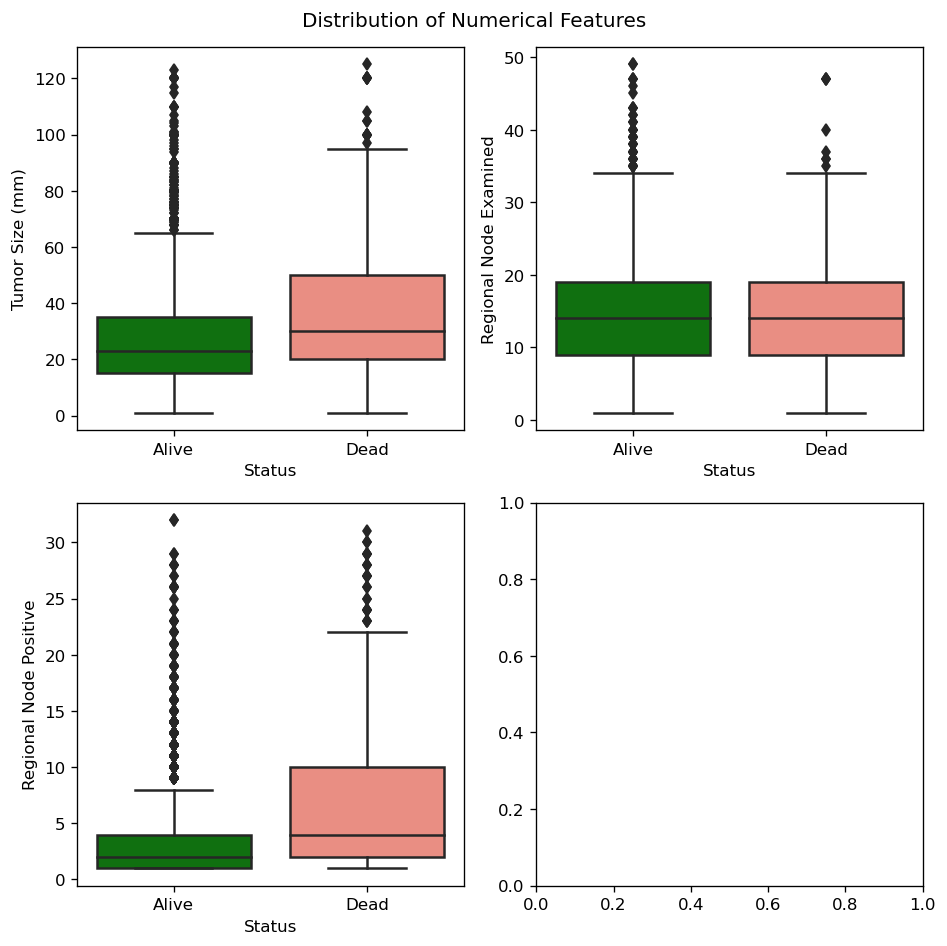

In [27]:
# Boxplot to visualize distribution of numerical features where outliers were removed
box_cols = ['Tumor Size (mm)', 'Regional Node Examined', 'Regional Node Positive']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8), dpi=120)
fig.suptitle('Distribution of Numerical Features', y = 0.98);
for col, ax in zip(box_cols, axes.ravel()):
    sns.boxplot(data=data, x='Status', y=col, ax=ax, palette=['green','salmon'])
plt.tight_layout()

### Age vs Survival Month for Breast Cancer

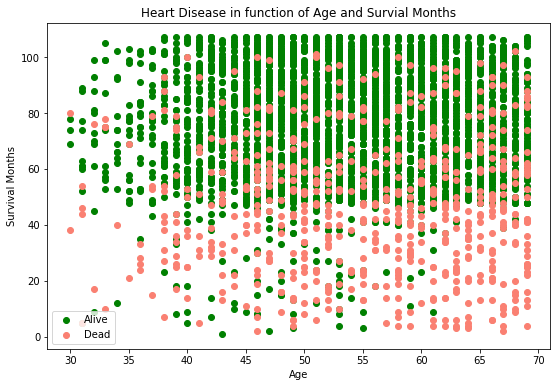

In [28]:
# create a new figure
plt.figure(figsize=(9,6))

# scatter with positive 
plt.scatter(data.Age[data.Status=='Alive'], data['Survival Months'][data.Status=='Alive'],c='green')
# scatter with negative 
plt.scatter(data.Age[data.Status=='Dead'], data['Survival Months'][data.Status=='Dead'], c='salmon')
plt.title('Heart Disease in function of Age and Survial Months')
plt.xlabel('Age')
plt.ylabel('Survival Months')
plt.legend(['Alive','Dead']);

### Regional Node Examined vs Survival Month

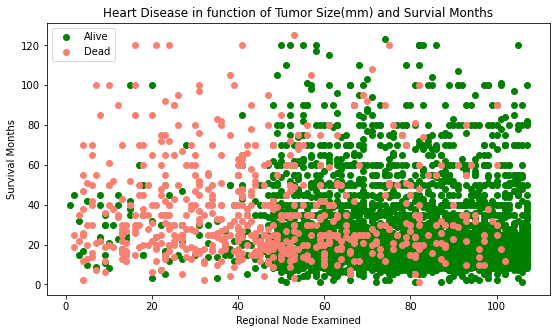

In [29]:
# create a new figure
plt.figure(figsize=(9,5))

# scatter with positive 
plt.scatter(data['Survival Months'][data.Status=='Alive'], data['Tumor Size (mm)'][data.Status=='Alive'],c='green')
# scatter with negative 
plt.scatter(data['Survival Months'][data.Status=='Dead'], data['Tumor Size (mm)'][data.Status=='Dead'], c='salmon')
plt.title('Heart Disease in function of Tumor Size(mm) and Survial Months')
plt.xlabel('Regional Node Examined')
plt.ylabel('Survival Months')
plt.legend(['Alive','Dead']);

### Survival month vs Regional Node Positive

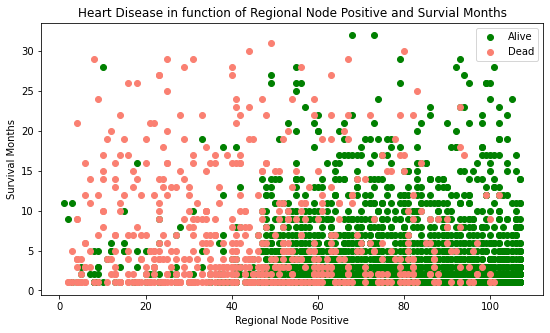

In [30]:
# create a new figure
plt.figure(figsize=(9,5))

# scatter with positive 
plt.scatter(data['Survival Months'][data.Status=='Alive'], data['Regional Node Positive'][data.Status=='Alive'],c='green')
# scatter with negative 
plt.scatter(data['Survival Months'][data.Status=='Dead'], data['Regional Node Positive'][data.Status=='Dead'], c='salmon')
plt.title('Heart Disease in function of Regional Node Positive and Survial Months')
plt.xlabel('Regional Node Positive')
plt.ylabel('Survival Months')
plt.legend(['Alive','Dead']);

In [31]:
# counting the values in Grade column
data['Grade'].value_counts()

2                        2337
3                        1100
1                         540
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

In [32]:
#replacing the 'anaplastic; Grade IV' in Grade clumn with 4
data['Grade'].replace([' anaplastic; Grade IV'],['4'],inplace=True)

In [33]:
# counting the values in Grade column to confirm the changes
data['Grade'].value_counts()

2    2337
3    1100
1     540
4      19
Name: Grade, dtype: int64

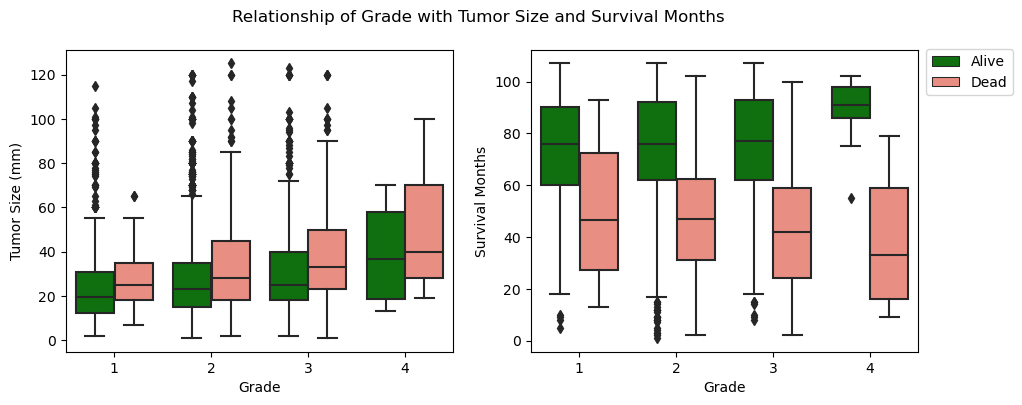

In [34]:
# Relationship of Grade with Tumor Size and Survival Months
grade_cols = ['Tumor Size (mm)', 'Survival Months']
# grade_order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4']
grade_order = ['1','2','3','4']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4), dpi=100)
fig.suptitle('Relationship of Grade with Tumor Size and Survival Months', y = 0.98);
for col, ax in zip(grade_cols, axes.ravel()):
    sns.boxplot(data=data, x='Grade', y=col, hue='Status', order=grade_order, palette=['green','salmon'], ax=ax)
    ax.legend_.remove()
ax.legend(loc=(1.02, 0.85));

In [35]:
# replacing the Alive & Dead values in the Status column with 1 & 0
data["Status"] = pd.to_numeric(data["Status"].replace(['Alive','Dead'], [1,0]))

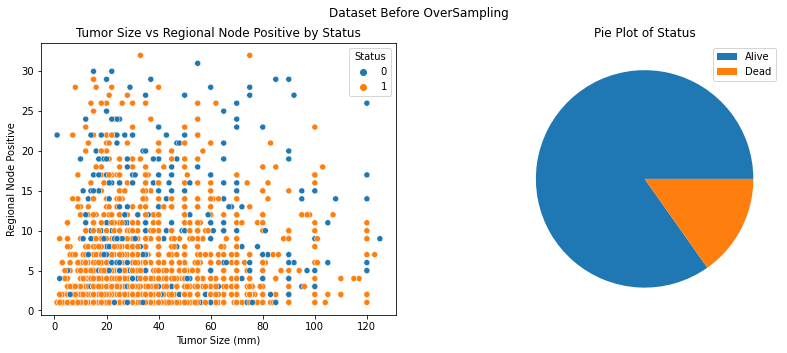

In [36]:
# create a new figure
fig,ax = plt.subplots(1,2,figsize=(14,5))
fig.suptitle('Dataset Before OverSampling')

# create a scatter plot with hue
sns.scatterplot(x=data['Tumor Size (mm)'], y=data['Regional Node Positive'], hue=data['Status'],
                ax=ax[0]).set(title = 'Tumor Size vs Regional Node Positive by Status')
plt.title('Heart Disease in function of Regional Node Positive and Survial Months');

plt.pie(data['Status'].value_counts())
plt.title('Pie Plot of Status')
plt.legend(['Alive','Dead']);

In [37]:
# Preprocessing the columns with labelEncoder
le = preprocessing.LabelEncoder()

data['Race']=le.fit_transform(data['Race'])
data['Marital Status']=le.fit_transform(data['Marital Status'])
data['N Stage']=le.fit_transform(data['N Stage'])
data['T Stage']=le.fit_transform(data['T Stage'])
data['6th Stage']=le.fit_transform(data['6th Stage'])
data['Differentiate']=le.fit_transform(data['Differentiate'])
data['Grade']=le.fit_transform(data['Grade'])
data['A Stage']=le.fit_transform(data['A Stage'])
data['Estrogen Status']=le.fit_transform(data['Estrogen Status'])
data['Progesterone Status']=le.fit_transform(data['Progesterone Status'])

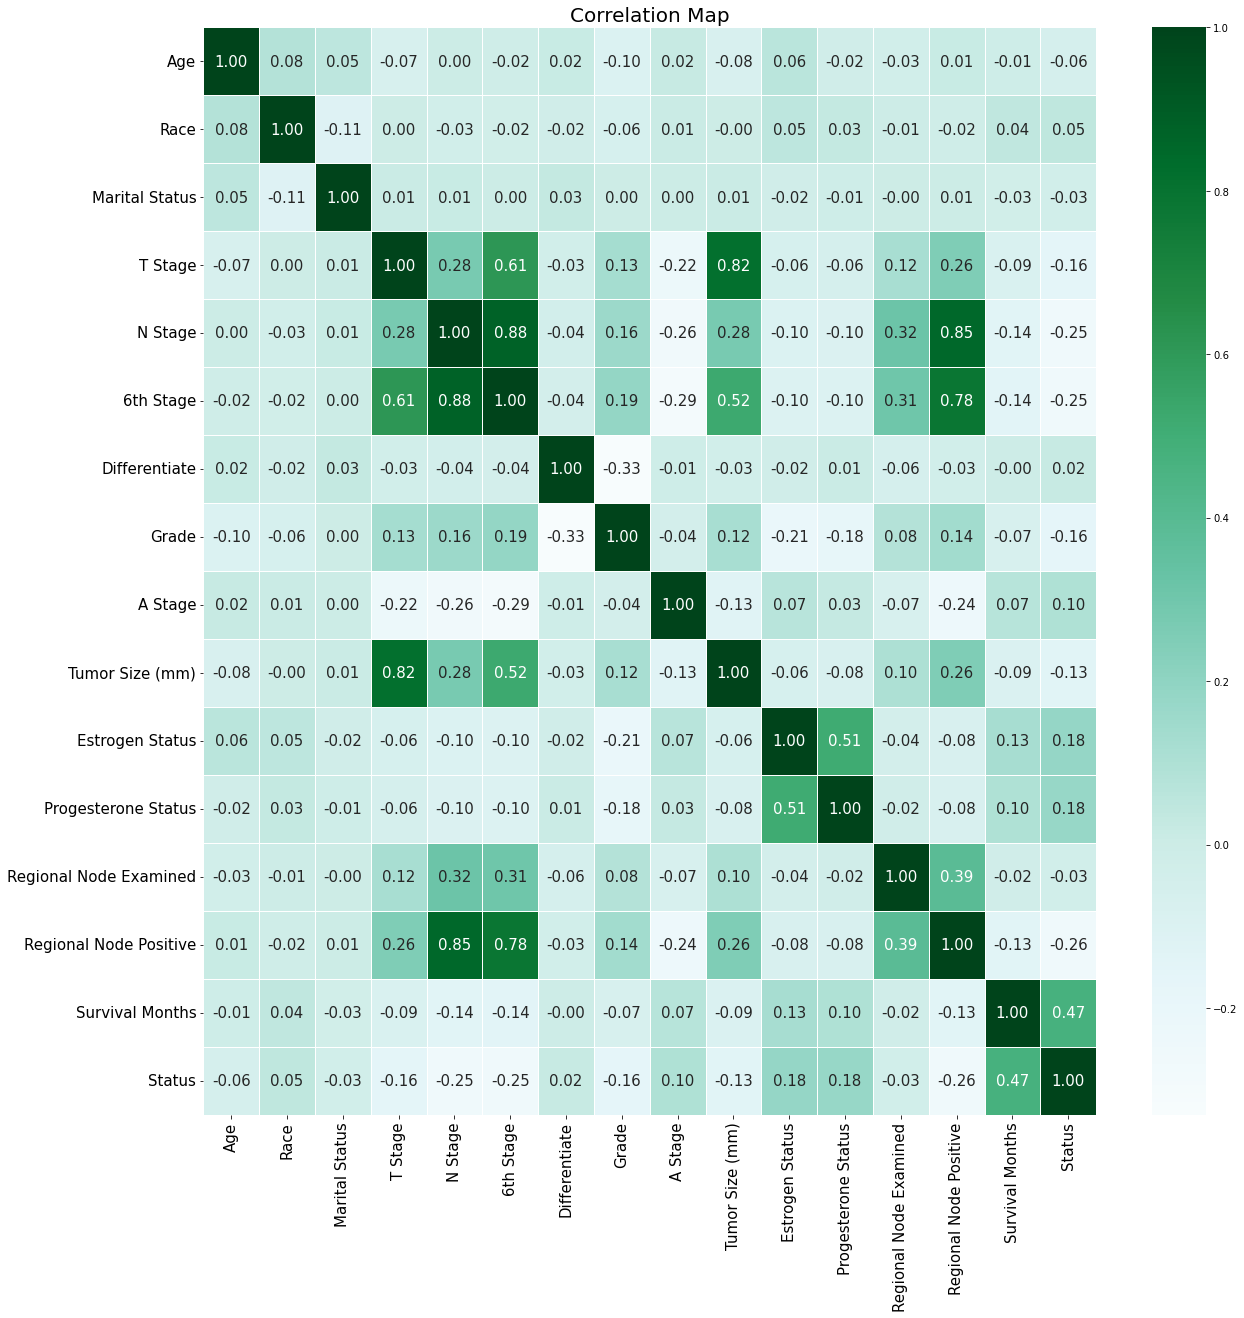

In [38]:
# correlaion map for all the variables
plt.figure(figsize=(20,20))

corr =  data.corr()

corr =data.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='BuGn',linewidths=.5, fmt= '.2f', annot_kws={"size": 15})

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.set_title('Correlation Map', size = 20)
plt.show()

In [39]:
# Oversampling the dataset
X = data.drop(['Status','Regional Node Examined','Regional Node Positive', '6th Stage','Differentiate','Marital Status'], axis=1)
y = data['Status']
over_sampler = RandomOverSampler(random_state=42)
X, y = over_sampler.fit_resample(X, y)

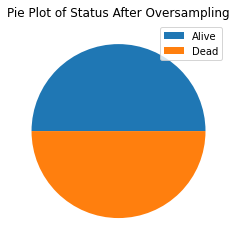

In [40]:
# Pie Plot of Status After Oversampling
data_smote = pd.merge(X, y, right_index=True, left_index=True)
plt.pie(data_smote['Status'].value_counts())
plt.title('Pie Plot of Status After Oversampling')
plt.legend(['Alive','Dead']);

Because of its high efficiency, the `SMOTE` oversampling method is the most used. It combines new instances with already existing ones. Synthetic minority oversampling approach is the name given to it.

In [41]:
# Splitting the dataset
X = data_smote.drop("Status", axis=1)
y = data_smote["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [42]:

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Reason for choosing the models

### Logistic Regression:
* For categorization problems, the logistic regression technique is an effective tool. Both interpretation and training are simple and quick. It's used to make predictions about binary outcomes (true or false, 0 or 1, yes or no) based on a number of independent variables.

### Random Forest:
* An ensemble learning technique called Random Forest is applied to classification and regression issues. It is a strong method that can handle high-dimensional data, is robust to outliers, and can manage datasets that are unbalanced.

### KNeighbor Classifier:
* A supervised machine learning technique called KNeighbor Classifier is applied to classification and regression issues. It is a non-parametric approach that bases its prediction on the observation's k-nearest neighbors.

### SVM:
* A supervised machine learning method called SVM is applied to classification and regression issues. It is a strong program with the ability to handle high-dimensional data and is resistant to outliers.

### Gaussian Naive Bayes:
* The supervised machine learning method Gaussian Naive Bayes is applied to classification and regression issues. It is a straightforward program that predicts outcomes with high accuracy and speed.

In [43]:
# Python function to run multiple machine learning model at once
def run_multiple_ml_models(models, X_train, X_test, y_train, y_test):
    '''
    This function takes in a list of multiple models, feature set and target variable as arguments and runs each 
    of the model one by one.
    '''
    
    accuracy = {}
    recall = {}
    precision = {}
    f1 = {}
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy[model] = accuracy_score(y_test, y_pred)
        recall[model] = recall_score(y_test, y_pred)
        precision[model] = precision_score(y_test, y_pred)
        f1[model] = f1_score(y_test,y_pred)
        
    return {'accuracy': accuracy,
           'recall': recall,
           'precision': precision,
           'f1 score': f1}

In [44]:
# putting the model to the list and passing the parameters to the function
models= [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), GaussianNB()]

scores = run_multiple_ml_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

In [45]:
# creating a dataframe for the results of the models
columns = []
accuracy = []
recall = []
precision = []
f1 = []

for key, value in scores.items():
    for model, score in value.items():
        if key == 'accuracy':
            accuracy.append(score)
        elif key == 'recall':
            recall.append(score)
        elif key == 'precision':
            precision.append(score)
        elif key == 'f1 score':
            f1.append(score)

columns = ['LogisticRegression()', 'RandomForestClassifier()', 'KNeighborsClassifier()', 'SVC()', 'GaussianNB()']
index = ['Accuracy', 'Recall', 'precision', 'f1_score']
data = [accuracy, recall, precision, f1]

df = pd.DataFrame(data, columns=columns, index=index)
df

,LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()
Accuracy,0.791298,0.970501,0.867257,0.795723,0.711652
Recall,0.820155,0.941085,0.778295,0.849612,0.844961
precision,0.760057,0.996716,0.931354,0.752747,0.651914
f1_score,0.788963,0.968102,0.847973,0.798252,0.735989


In [46]:
# function to create confusion matrix fo the models
def plot_confusion_matrix(models, X_train, X_test, y_train, y_test):
    '''
    This function takes in a list of machine learning models, feature set and target variable as arguments and plots confusion 
    matrix for each of the model.
    '''
    plt.figure(figsize=(12,15))
    for i, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        conf = confusion_matrix(y_test, y_pred)
        plt.subplot(3, 2, i+1)
        sns.heatmap(conf, annot=True, fmt="d")
        plt.title(model.__class__.__name__)
        plt.xlabel('Predicted Value')
        plt.ylabel('True Value')
    plt.show()

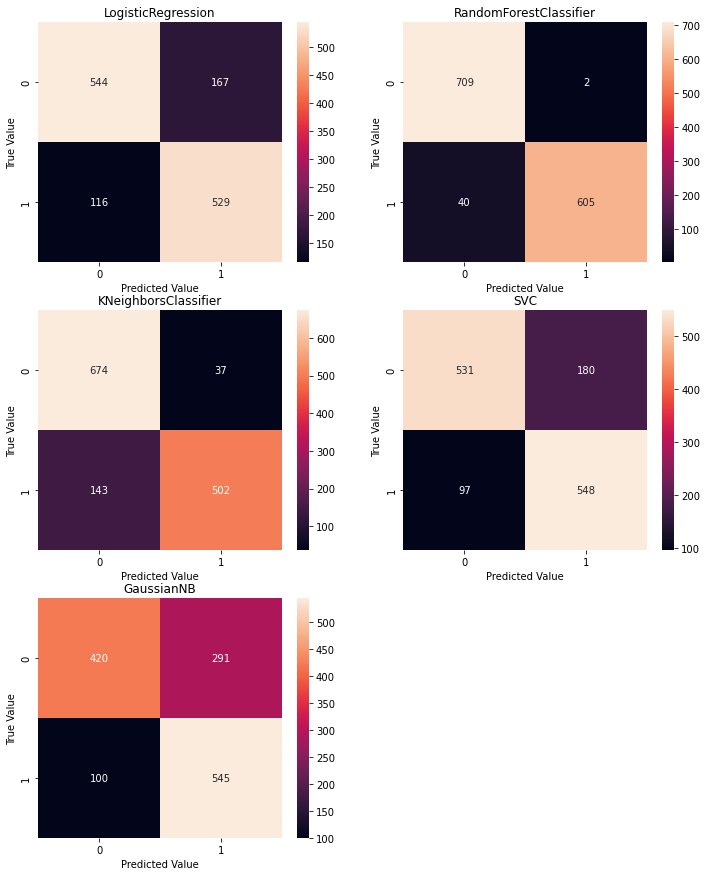

In [47]:
# passing the parameters to the function
conf = plot_confusion_matrix(models, X_train_scaled, X_test_scaled, y_train, y_test)

In [48]:
#function to plot the roc curve
def plot_roc_curve(models, X_train, X_test, y_train, y_test):
    '''
    This function takes in a list of machine learning models, feature set and target variable as arguments and plots ROC curves 
    for each of the model.
    '''
    plt.figure(figsize=(15,15))
    for i, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred[:,1])
        auc_score = roc_auc_score(y_test, y_pred[:,1])
        plt.subplot(3, 3, i+1)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([-0.05, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(model.__class__.__name__)
        plt.legend(loc="lower right")
    plt.show()

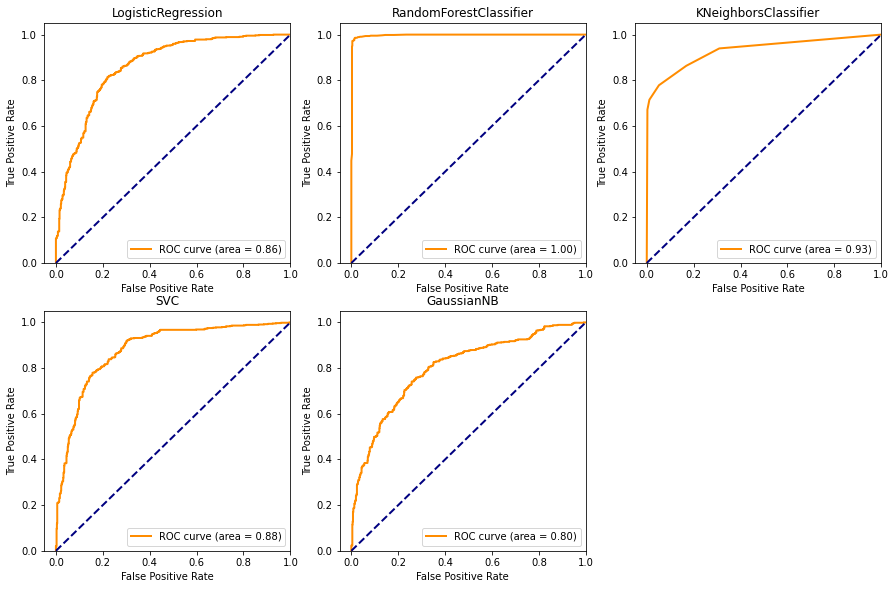

In [49]:
# calling the plot_roc_curve
models= [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), SVC(probability=True), GaussianNB()]

roc = plot_roc_curve(models, X_train_scaled, X_test_scaled, y_train, y_test)

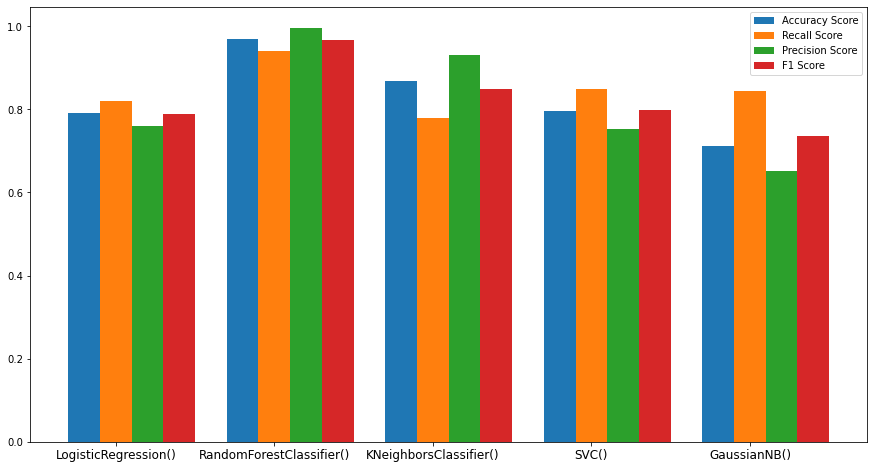

In [50]:
# histogram plot for the comparison of the models
columns = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), GaussianNB()]
x = np.arange(len(columns))
width = 0.20

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy Score')
rects2 = ax.bar(x, recall, width, label='Recall Score')
rects3 = ax.bar(x + width, precision, width, label='Precision Score')
rects4 = ax.bar(x + 2*width, f1, width, label='F1 Score')

ax.set_xticks(x)
ax.set_xticklabels(columns, size=12)
ax.legend()

plt.show()

# Tuning the models

In [51]:
# GridSearchCV function for model tuning 
def tune_model_hyperparameters(model, X_train, X_test, y_train, y_test, hyperparameters):
    grid_search = GridSearchCV(model, hyperparameters, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_preds = grid_search.predict(X_test)
    y_probs = grid_search.predict_proba(X_test)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    grid_search_y_pred = grid_search.predict(X_test)
    
    accuracy = accuracy_score(y_test, grid_search_y_pred)
    recall = recall_score(y_test, grid_search_y_pred)
    precision = precision_score(y_test, grid_search_y_pred)
    f1 = f1_score(y_test, grid_search_y_pred)
    
    metrics = {'accuracy score ': round(accuracy, 2),
         'recall score ': round(recall, 2),
         'precision score ': round(precision, 2),
         'f1 score ': round(f1, 2)}
    
    return best_params, metrics, y_preds, y_probs

### Confusion Matrix 

In [52]:
def plot_confusion_matrix(model, X_test, y_test):

  # Generate the predictions
  y_pred = model[2]

  # Calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Create a dataframe from the confusion matrix
  cm_df = pd.DataFrame(cm, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

  # Plot the confusion matrix
  sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues_r')

  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")

  plt.show()

### ROC Curve

In [53]:
def plot_roc_curve(model, X_test, y_test):

    # Generate the probabilities
    y_pred = model[2]
    y_probs = model[3]

    # Generate the fpr and tpr
    fpr, tpr, _ = roc_curve(y_test, y_probs[:,1])
    auc_score = roc_auc_score(y_test, y_probs[:,1])
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)

    plt.legend(loc="lower right")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    plt.show()

### Plot performnce metrics

In [54]:
def plot_performance_metrics(comparison):
    """
    Bar plot to visualize performance metrics
    """
    
    columns = comparison.index
    accuracy = [round(comparison['accuracy score '][0],3), round(comparison['accuracy score '][1],3)]
    recall = [round(comparison['recall score '][0],3), round(comparison['recall score '][1],3)]
    precision = [round(comparison['precision score '][0],3), round(comparison['precision score '][1],3)]
    f1 = [round(comparison['f1 score '][0],3), round(comparison['f1 score '][1],3)]

    x = np.arange(len(columns))
    width = 0.20

    fig, ax = plt.subplots(figsize=(15,8))
    rects1 = ax.bar(x - width, accuracy, width, label='Accuracy Score')
    rects2 = ax.bar(x, recall, width, label='Recall Score')
    rects3 = ax.bar(x + width, precision, width, label='Precision Score')
    rects4 = ax.bar(x + 2*width, f1, width, label='F1 Score')

    ax.set_xticks(x)
    ax.set(title = 'Comparison between the initial model and tuned model scores')
    # plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    ax.set_xticklabels(columns, size=12)
    ax.legend()

    # Let the each value on the plot
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    plt.show()

##  Logistic Regression

In [55]:
model= LogisticRegression()
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [56]:
hyperparameters = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                   'penalty' : ['l2'],
                   'C' : [1.0, 0.1, 0.01] }
lr_gscv = tune_model_hyperparameters(model, X_train_scaled, X_test_scaled, y_train, y_test, hyperparameters)

In [57]:
lr_gscv

({'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'accuracy score ': 0.79,
  'recall score ': 0.82,
  'precision score ': 0.75,
  'f1 score ': 0.79},
 array([1, 1, 1, ..., 1, 0, 0], dtype=int64),
 array([[0.09900776, 0.90099224],
        [0.28240556, 0.71759444],
        [0.44776231, 0.55223769],
        ...,
        [0.43924171, 0.56075829],
        [0.58368456, 0.41631544],
        [0.98528207, 0.01471793]]))

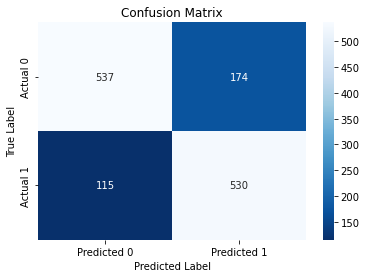

In [58]:
# Call the plot_confusion_matrix function
plot_confusion_matrix(lr_gscv, X_test_scaled, y_test)

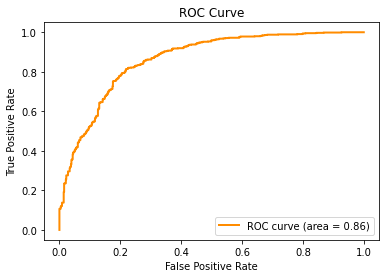

In [59]:
# Call the plot_roc_curve function
plot_roc_curve(lr_gscv, X_test_scaled, y_test)

In [60]:
df1 = pd.DataFrame(lr_gscv[1], index=[1])
df1

,accuracy score,recall score,precision score,f1 score
1,0.79,0.82,0.75,0.79


In [61]:
df2 = pd.DataFrame(df['LogisticRegression()'])
df2 = df2.T
df2

,Accuracy,Recall,precision,f1_score
LogisticRegression(),0.791298,0.820155,0.760057,0.788963


In [62]:
LRs = pd.DataFrame(np.concatenate([df2.values, df1.values]), columns=list(df1.columns),
             index=['Logisitic Regresion', 'Tuned Logistic Regression'])
LRs

,accuracy score,recall score,precision score,f1 score
Logisitic Regresion,0.791298,0.820155,0.760057,0.788963
Tuned Logistic Regression,0.790000,0.820000,0.750000,0.790000


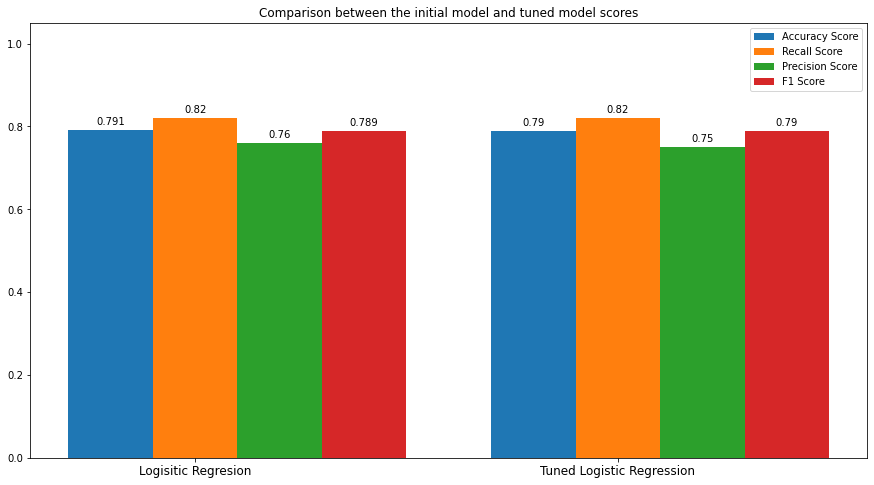

In [63]:
# Call the plot_performance_metrics function
plot_performance_metrics(LRs)

## Random Forest 

In [64]:
model= RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [65]:
hyperparameters = {'n_estimators' : [10, 100, 1000],
                   'max_features' : ['sqrt', 'log2']}
rf_gscv = tune_model_hyperparameters(model, X_train_scaled, X_test_scaled, y_train, y_test, hyperparameters)

In [66]:
rf_gscv

({'max_features': 'log2', 'n_estimators': 1000},
 {'accuracy score ': 0.97,
  'recall score ': 0.94,
  'precision score ': 1.0,
  'f1 score ': 0.97},
 array([1, 1, 1, ..., 1, 0, 0], dtype=int64),
 array([[0.068, 0.932],
        [0.241, 0.759],
        [0.148, 0.852],
        ...,
        [0.086, 0.914],
        [0.988, 0.012],
        [0.998, 0.002]]))

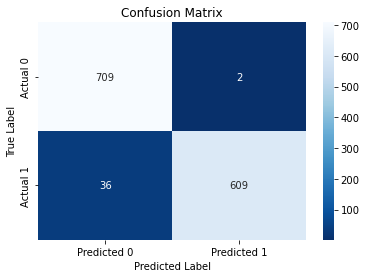

In [67]:
# Call the plot_confusion_matrix function
plot_confusion_matrix(rf_gscv, X_test_scaled, y_test)

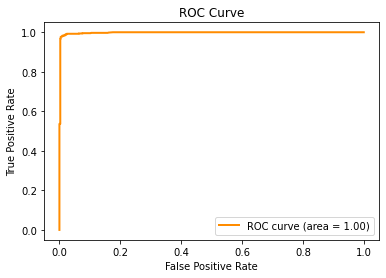

In [68]:
# Call the plot_roc_curve function
plot_roc_curve(rf_gscv, X_test_scaled, y_test)

In [69]:
df1 = pd.DataFrame(rf_gscv[1], index=[1])
df1

,accuracy score,recall score,precision score,f1 score
1,0.97,0.94,1.0,0.97


In [70]:
df2 = pd.DataFrame(df['RandomForestClassifier()'])
df2 = df2.T
df2

,Accuracy,Recall,precision,f1_score
RandomForestClassifier(),0.970501,0.941085,0.996716,0.968102


In [71]:
RFs = pd.DataFrame(np.concatenate([df2.values, df1.values]), columns=list(df1.columns),
             index=['RandomForestClassifier', 'Tuned RandomForestClassifier'])
RFs

,accuracy score,recall score,precision score,f1 score
RandomForestClassifier,0.970501,0.941085,0.996716,0.968102
Tuned RandomForestClassifier,0.970000,0.940000,1.000000,0.970000


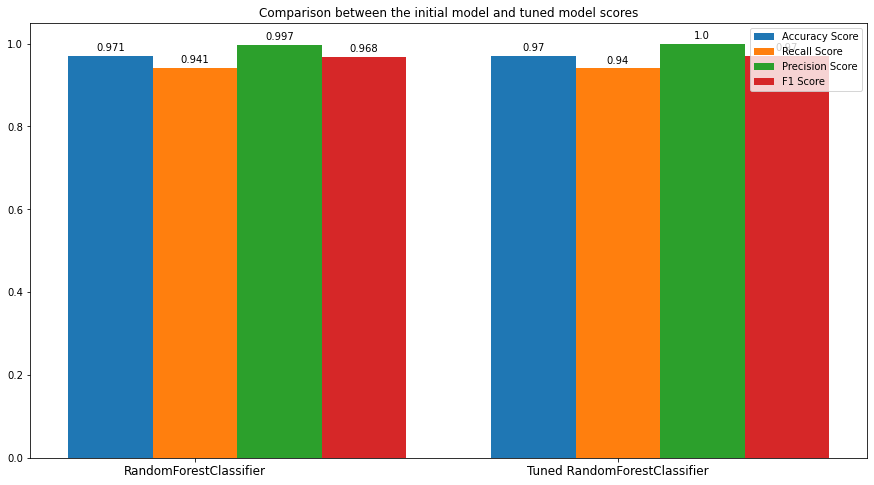

In [72]:
# Call the plot_performance_metrics function
plot_performance_metrics(RFs)

## KNeighborsClassifier

In [73]:
model= KNeighborsClassifier()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [74]:
hyperparameters = {'n_neighbors' : range(1, 11, 2),
                   'weights' : ['uniform', 'distance'],
                   'metric' : ['euclidean', 'manhattan', 'minkowski']}
kn_gscv = tune_model_hyperparameters(model, X_train_scaled, X_test_scaled, y_train, y_test, hyperparameters)

In [75]:
kn_gscv

({'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'},
 {'accuracy score ': 0.95,
  'recall score ': 0.89,
  'precision score ': 1.0,
  'f1 score ': 0.94},
 array([1, 1, 1, ..., 1, 0, 0], dtype=int64),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [1., 0.]]))

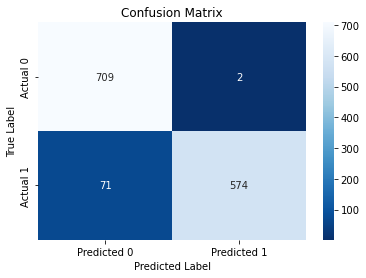

In [76]:
# Call the plot_confusion_matrix function
plot_confusion_matrix(kn_gscv, X_test_scaled, y_test)

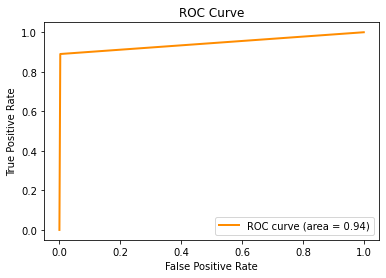

In [77]:
# Call the plot_roc_curve function
plot_roc_curve(kn_gscv, X_test_scaled, y_test)

In [78]:
df1 = pd.DataFrame(kn_gscv[1], index=[1])
df1

,accuracy score,recall score,precision score,f1 score
1,0.95,0.89,1.0,0.94


In [79]:
df2 = pd.DataFrame(df['KNeighborsClassifier()'])
df2 = df2.T
df2

,Accuracy,Recall,precision,f1_score
KNeighborsClassifier(),0.867257,0.778295,0.931354,0.847973


In [80]:
KNs = pd.DataFrame(np.concatenate([df2.values, df1.values]), columns=list(df1.columns),
             index=['KNeighborsClassifier', 'Tuned KNeighborsClassifier'])
KNs

,accuracy score,recall score,precision score,f1 score
KNeighborsClassifier,0.867257,0.778295,0.931354,0.847973
Tuned KNeighborsClassifier,0.950000,0.890000,1.000000,0.940000


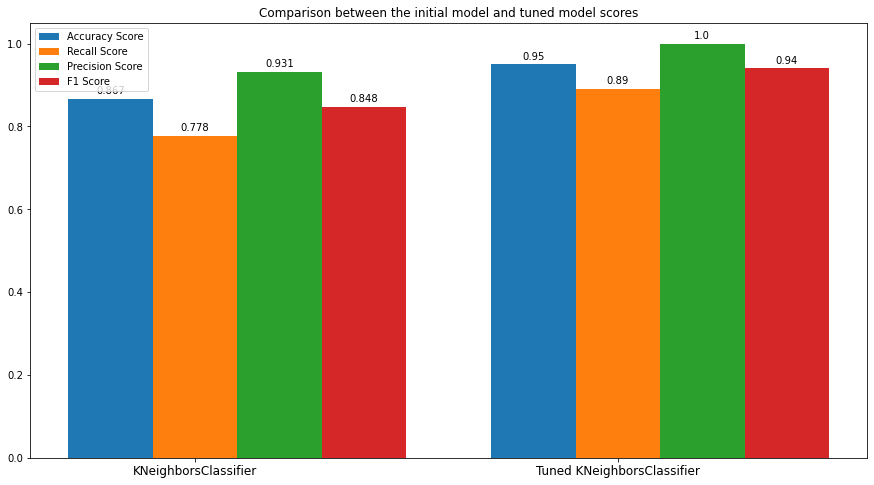

In [81]:
# Call the plot_performance_metrics function
plot_performance_metrics(KNs)

##  Support Vector Machine (SVM)

In [82]:
model= SVC(probability = True)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [83]:
hyperparameters = {'kernel' : ['poly', 'rbf', 'sigmoid'],
                   'C' : [100, 50, 10, 1.0, 0.1],
                   'gamma' : ['scale']}
svm_gscv = tune_model_hyperparameters(model, X_train_scaled, X_test_scaled, y_train, y_test, hyperparameters)

In [84]:
svm_gscv

({'C': 100, 'gamma': 'scale', 'kernel': 'rbf'},
 {'accuracy score ': 0.86,
  'recall score ': 0.87,
  'precision score ': 0.85,
  'f1 score ': 0.86},
 array([1, 1, 1, ..., 1, 0, 0], dtype=int64),
 array([[0.11193088, 0.88806912],
        [0.135294  , 0.864706  ],
        [0.23066277, 0.76933723],
        ...,
        [0.23895194, 0.76104806],
        [0.88841507, 0.11158493],
        [0.80931681, 0.19068319]]))

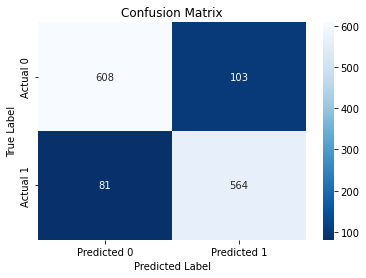

In [85]:
# Call the plot_confusion_matrix function
plot_confusion_matrix(svm_gscv, X_test_scaled, y_test)

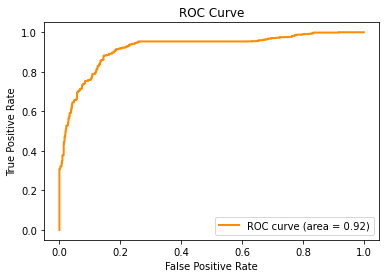

In [86]:
# Call the plot_roc_curve function
plot_roc_curve(svm_gscv, X_test_scaled, y_test)

In [87]:
df1 = pd.DataFrame(svm_gscv[1], index=[1])
df1

,accuracy score,recall score,precision score,f1 score
1,0.86,0.87,0.85,0.86


In [88]:
df2 = pd.DataFrame(df['SVC()'])
df2 = df2.T
df2

,Accuracy,Recall,precision,f1_score
SVC(),0.795723,0.849612,0.752747,0.798252


In [89]:
SVMs = pd.DataFrame(np.concatenate([df2.values, df1.values]), columns=list(df1.columns),
             index=['Support Vector Machine', 'Tuned Support Vector Machine'])
SVMs

,accuracy score,recall score,precision score,f1 score
Support Vector Machine,0.795723,0.849612,0.752747,0.798252
Tuned Support Vector Machine,0.860000,0.870000,0.850000,0.860000


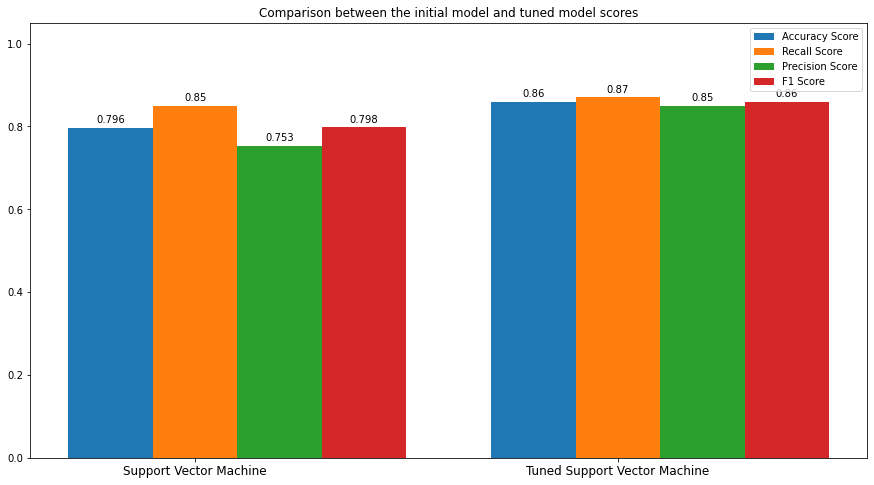

In [90]:
# Call the plot_performance_metrics function
plot_performance_metrics(SVMs)

## Gaussian Naive Bayes

In [91]:
model = GaussianNB()
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [92]:
hyperparameters = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb_gscv = tune_model_hyperparameters(model, X_train_scaled, X_test_scaled, y_train, y_test, hyperparameters)

In [93]:
gnb_gscv

({'var_smoothing': 0.01},
 {'accuracy score ': 0.71,
  'recall score ': 0.84,
  'precision score ': 0.65,
  'f1 score ': 0.73},
 array([1, 1, 1, ..., 1, 1, 0], dtype=int64),
 array([[8.75368401e-03, 9.91246316e-01],
        [3.10888400e-02, 9.68911160e-01],
        [4.11554794e-02, 9.58844521e-01],
        ...,
        [5.58628271e-02, 9.44137173e-01],
        [4.09927559e-01, 5.90072441e-01],
        [1.00000000e+00, 5.06233487e-12]]))

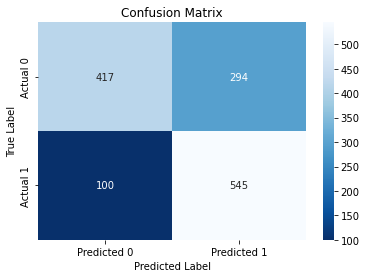

In [94]:
# Call the plot_confusion_matrix function
plot_confusion_matrix(gnb_gscv, X_test_scaled, y_test)

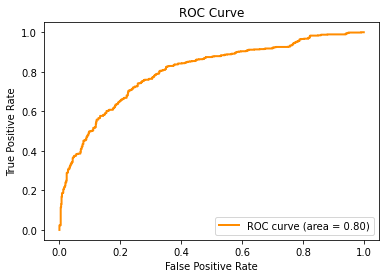

In [95]:
# Call the plot_roc_curve function
plot_roc_curve(gnb_gscv, X_test_scaled, y_test)

In [96]:
df1 = pd.DataFrame(gnb_gscv[1], index=[1])
df1

,accuracy score,recall score,precision score,f1 score
1,0.71,0.84,0.65,0.73


In [97]:
df2 = pd.DataFrame(df['GaussianNB()'])
df2 = df2.T
df2

,Accuracy,Recall,precision,f1_score
GaussianNB(),0.711652,0.844961,0.651914,0.735989


In [98]:
GNBs = pd.DataFrame(np.concatenate([df2.values, df1.values]), columns=list(df1.columns),
             index=['GaussianNB', 'Tuned GaussianNB'])
GNBs

,accuracy score,recall score,precision score,f1 score
GaussianNB,0.711652,0.844961,0.651914,0.735989
Tuned GaussianNB,0.710000,0.840000,0.650000,0.730000


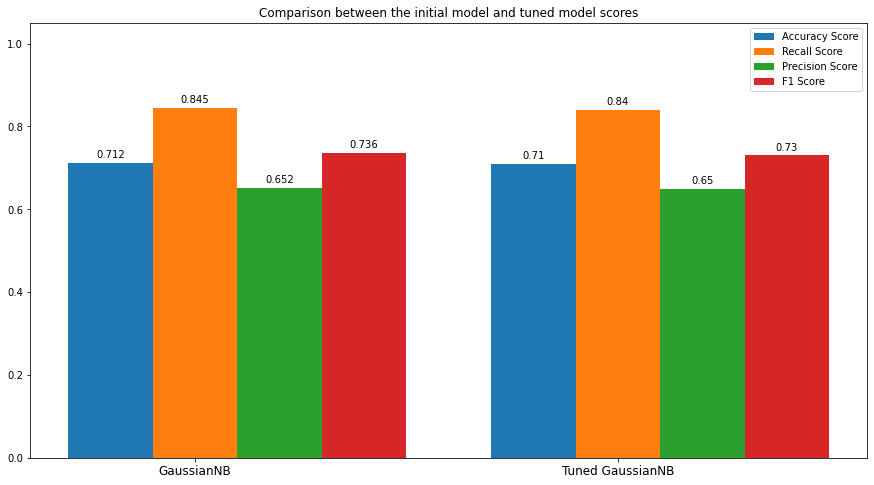

In [99]:
# Call the plot_performance_metrics function
plot_performance_metrics(GNBs)

# Multi-Layer Perceptron Model (MLP): Neural Network

In [100]:
#Defining the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
model.fit(X_train_scaled, y_train, epochs=200, batch_size=20, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/200
271/271 [==============================] - 1s 2ms/step - loss: 0.6359 - accuracy: 0.6862 - val_loss: 0.4839 - val_accuracy: 0.7625
Epoch 2/200
271/271 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.7415 - val_loss: 0.4628 - val_accuracy: 0.7854
Epoch 3/200
271/271 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7570 - val_loss: 0.4580 - val_accuracy: 0.7920
Epoch 4/200
271/271 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.7609 - val_loss: 0.4545 - val_accuracy: 0.7928
Epoch 5/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.7673 - val_loss: 0.4528 - val_accuracy: 0.7942
Epoch 6/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.7653 - val_loss: 0.4497 - val_accuracy: 0.7935
Epoch 7/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.7679 - val_loss: 0.4498 - val_accuracy: 0.7920

Epoch 58/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.7860 - val_loss: 0.4241 - val_accuracy: 0.7972
Epoch 59/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.7891 - val_loss: 0.4237 - val_accuracy: 0.8001
Epoch 60/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.7891 - val_loss: 0.4227 - val_accuracy: 0.7942
Epoch 61/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7991 - val_loss: 0.4209 - val_accuracy: 0.8038
Epoch 62/200
271/271 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.7886 - val_loss: 0.4179 - val_accuracy: 0.8075
Epoch 63/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.7900 - val_loss: 0.4205 - val_accuracy: 0.7965
Epoch 64/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.7917 - val_loss: 0.4185 - val_accuracy:

Epoch 115/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7924 - val_loss: 0.4097 - val_accuracy: 0.8053
Epoch 116/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7983 - val_loss: 0.4032 - val_accuracy: 0.8038
Epoch 117/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.7932 - val_loss: 0.4080 - val_accuracy: 0.7987
Epoch 118/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8046 - val_loss: 0.4081 - val_accuracy: 0.8038
Epoch 119/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.7943 - val_loss: 0.4068 - val_accuracy: 0.8009
Epoch 120/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.7934 - val_loss: 0.4058 - val_accuracy: 0.8105
Epoch 121/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.7976 - val_loss: 0.4048 - val_ac

In [102]:
# Evaluating the model
y_pred = model.predict_classes(X_test_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [103]:
#Accuracy score
acc_mlp = accuracy_score(y_test, y_pred)
print('Accuracy score is: ', acc_mlp)

Accuracy score is:  0.8112094395280236


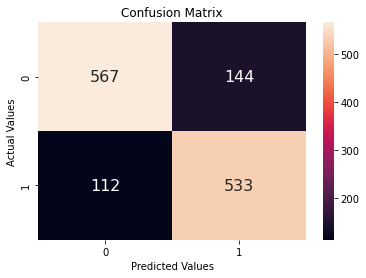

In [104]:
#Confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_mlp, annot=True, fmt='d', annot_kws={"size": 16})
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()

In [105]:
#Classification report
cr_mlp = classification_report(y_test, y_pred)
print('Classification report: \n', cr_mlp)

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       711
           1       0.79      0.83      0.81       645

    accuracy                           0.81      1356
   macro avg       0.81      0.81      0.81      1356
weighted avg       0.81      0.81      0.81      1356



# Optimization of MLP

In [106]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [107]:
model.fit(X_train_scaled, y_train, epochs=200, batch_size=20, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/200
271/271 [==============================] - 1s 2ms/step - loss: 0.5661 - accuracy: 0.7223 - val_loss: 0.4557 - val_accuracy: 0.7839
Epoch 2/200
271/271 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7589 - val_loss: 0.4370 - val_accuracy: 0.7972
Epoch 3/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7710 - val_loss: 0.4344 - val_accuracy: 0.8016
Epoch 4/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.7755 - val_loss: 0.4350 - val_accuracy: 0.7935
Epoch 5/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7720 - val_loss: 0.4315 - val_accuracy: 0.8016
Epoch 6/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.7784 - val_loss: 0.4234 - val_accuracy: 0.8001
Epoch 7/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.7808 - val_loss: 0.4244 - val_accuracy: 0.8083

Epoch 58/200
271/271 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8247 - val_loss: 0.3314 - val_accuracy: 0.8510
Epoch 59/200
271/271 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8271 - val_loss: 0.3386 - val_accuracy: 0.8481
Epoch 60/200
271/271 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8266 - val_loss: 0.3407 - val_accuracy: 0.8532
Epoch 61/200
271/271 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8387 - val_loss: 0.3388 - val_accuracy: 0.8488
Epoch 62/200
271/271 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8382 - val_loss: 0.3372 - val_accuracy: 0.8385
Epoch 63/200
271/271 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.8299 - val_loss: 0.3300 - val_accuracy: 0.8473
Epoch 64/200
271/271 [==============================] - 0s 1ms/step - loss: 0.3674 - accuracy: 0.8310 - val_loss: 0.3415 - val_accuracy:

Epoch 115/200
271/271 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8472 - val_loss: 0.2980 - val_accuracy: 0.8665
Epoch 116/200
271/271 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8498 - val_loss: 0.2960 - val_accuracy: 0.8761
Epoch 117/200
271/271 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8467 - val_loss: 0.2968 - val_accuracy: 0.8628
Epoch 118/200
271/271 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8513 - val_loss: 0.2905 - val_accuracy: 0.8732
Epoch 119/200
271/271 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8528 - val_loss: 0.2956 - val_accuracy: 0.8768
Epoch 120/200
271/271 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8502 - val_loss: 0.2978 - val_accuracy: 0.8724
Epoch 121/200
271/271 [==============================] - 0s 1ms/step - loss: 0.3444 - accuracy: 0.8482 - val_loss: 0.2936 - val_ac

In [108]:
# Evaluating the model
y_pred = model.predict_classes(X_test_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [109]:
#Accuracy score
acc_mlp = accuracy_score(y_test, y_pred)
print('Accuracy score is: ', acc_mlp)

Accuracy score is:  0.8967551622418879


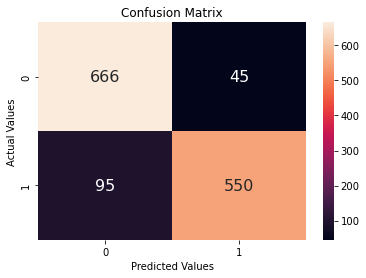

In [110]:
#Confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_mlp, annot=True, fmt='d', annot_kws={"size": 16})
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()

In [111]:
#Classification report
cr_mlp = classification_report(y_test, y_pred)
print('Classification report: \n', cr_mlp)

Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.90       711
           1       0.92      0.85      0.89       645

    accuracy                           0.90      1356
   macro avg       0.90      0.89      0.90      1356
weighted avg       0.90      0.90      0.90      1356

